#### Week 4 Lab Exercise & Assignment: 
## PREDICTING WITH >2 CLASSES & MY FIRST NEURAL NETWORK

#### Arianna Bisazza & Prajit Dhar
#### Introduction to Neural Networks
#### BSc Information Science, University of Groningen, September 2021  

#### By: Felix Zailskas
#### S3918270

Goals of this exercise:
- Understand how the Softmax function works, and its application to classification with >2 classes 
- Understand how Feed-Forward Neural Networks (FFNNs) work
- Implement simple FFNNs using vector operations as well as traditional loops


In [1]:
import numpy as np

----
### REVISION: DOT PRODUCT

Revise the definition of dot product explained at the beginning of Week 3 Lecture. <br/> 
Manually compute the following example and check the results corresponds to the one returned by numpy.dot below:

In [2]:
vector_w = np.array([2, 3, 6])

vector_x = np.array([3, -5, 1])

dotprod_wx = np.dot(vector_w, vector_x)
dotprod_wx

-3

Notice the dot product of two vectors results in a *scalar* (i.e. one number) as opposed to a **vector**

----
### SOFTMAX / PREDICTING WITH >2 CLASSES

Remember how the **sigmoid** function was used to turn the result of a weighted sum of features (plus the bias) into a probability (Week 2 Lecture). This was in the case of a binary choice.

Here's again the definition of sigmoid for your revision:

In [3]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

And a complete example of **binary-choice** LogReg prediction for a given set of weights and bias, and a given input sample:

In [4]:
# vector of weights
vector_w = np.array([0.4, 0.2, 0.7])

# bias
b = 1

# input representation for one sample (for simplicity let's assume binary features, such as 'is_green', 'is_round', etc.)
vector_x = np.array([0, 1, 1])

# result of weighted sum of features plus bias
z = np.dot(vector_w, vector_x) + b

# predicted probability
p_yes = sigmoid(z)
p_yes

0.8698915256370021

But what if we wanted a Logistic Regression Classifier to work **with more than 2 classes**? <br/>
(that is ***Multinomial Logistic Regression***)

Let's call the result of a weighted sum of features (plus bias): ***z***. <br/>
In the case of >2 classes, we'll have separate weights (and bias term) for each possible class. <br/>
Hence, we'll get a different *z* for each possible class. 

We'd like that bunch of numbers to look like a proper probability distribution, that is: every value in the range (0,1) and their sum = 1.

For instance: 
- p(c=watermelon|x) = 0.05
- p(c=apple|x) = 0.7
- p(c=pear|x) = 0.2
- p(c=cherry|x) = 0.05


That's precisely what the **softmax** function does!<br/>

Softmax is a generalization of sigmoid that can be applied to vectors (arrays of numbers). Here's the definition:

In [5]:
def softmax(Z):
    exponentials = np.exp(Z)
    sum_of_exponentials = np.sum(np.exp(Z))
    return exponentials/sum_of_exponentials


Let's adapt our example above to the case of 4 output classes (e.g. watermelon, apple, pear, cherry)

In [6]:
# vectors of weights
weights_wmelon = (0.5, 0.5, 0.7)
weights_apple  = (0.4, 0.1, 0.7)
weights_pear   = (0.8, 0.2, 0.3)
weights_cherry = (0.01, 0.4, 0.6)

# let's pack them all into a single matrix (simply think of it as a table with 4 rows and 3 columns) 
matrix_w = np.array([weights_wmelon, weights_apple, weights_pear, weights_cherry])
print(matrix_w)
print(matrix_w.shape)

# one bias per output class
vector_b = [2, 2, 2, 2]

# input representation for one sample (again assuming binary features, such as 'is_green', 'is_red', 'is_round')
vector_x = np.array([1, 0, 1])

# results of weighted sum of features plus bias (one number per output class!)
vector_z = np.dot(matrix_w, vector_x) + vector_b

# output probabilities (one number per output class)
vector_probs = softmax(vector_z)
vector_probs

[[0.5  0.5  0.7 ]
 [0.4  0.1  0.7 ]
 [0.8  0.2  0.3 ]
 [0.01 0.4  0.6 ]]
(4, 3)


array([0.29726497, 0.26897647, 0.26897647, 0.16478209])

### >> LAB TASK 1
The example above assigns identical weights and bias to each of the 4 classes, leading to identical probabilities for all classes. That's not very useful. <br/>
- Play with the weights and notice how the resulting output probabilities change.
- Keep weights values fixed, and only change the bias of one of the classes. Notice how sensitive the output probabilities are to an increase (or decrease) of the bias. (The bias term and its importance were explained in Week 2 Lecture)

----

### MY FIRST NEURAL NETWORK

We're now ready to implement our first (feed-forward) neural network!

We'll start from the simplest possible case: a Feed-Forward NN (FFNN) with 1 hidden layer<br/>
This consists of:
- hidden layer: a number of non-linear units, each fully-connected to the input units. You may think of this layer as a sort of feature extractor.
- output layer predicting the probability of possible outcomes. For now, we assume again a binary choice, hence only 1 output unit. However this could be easily scaled to multiple classes using Softmax, as explained above for Multinomial LogReg.


In [7]:
# helper function sigmoid
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

# we'll just use sigmoid as our non-linear function, but others could be plugged here (like tanh, ReLU, etc.)
def non_linear(z):
    return sigmoid(z)


Note the FFNN below has the following dimensions:
- input: 4 (4 input values per sample)
- hidden layer: 3 (that is, 3 hidden units)
- output layer dimension: 1 (that is, 1 output unit for binary classification).

This corresponds exactly to the small FFNN architecture introduced in Week 4 Lecture. We also provide a graphical view, annotated with all weights (straight arrows) and bias terms (dotted arrows).  
Observe carefully how the weights in the figure correspond to those given in the code below:

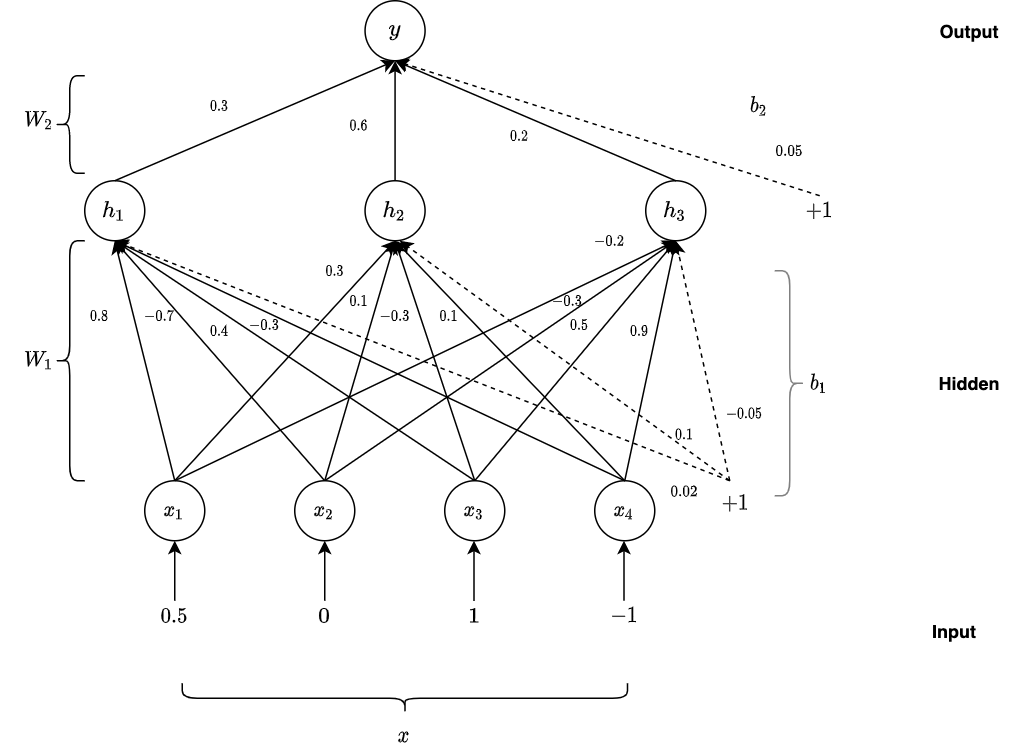

In [8]:
# input representation for one sample with 4 dimensions 
vector_x = np.array([0.5, 0, 1, -1])


In [9]:
# hidden unit 1
vector_w_h1 = np.array([0.8, -0.7, 0.4, -0.3])
b_h1 = 0.02
output_h1 = non_linear(np.dot(vector_x, vector_w_h1) + b_h1)

# hidden unit 2
vector_w_h2 = np.array([0.3, 0.1, -0.3, 0.1])
b_h2 = 0.1
output_h2 = non_linear(np.dot(vector_x, vector_w_h2) + b_h2)

# hidden unit 3
vector_w_h3 = np.array([-0.2, -0.3, 0.5, 0.9])
b_h3 = -0.05
output_h3 = non_linear(np.dot(vector_x, vector_w_h3) + b_h3)

# pack resulting hidden unit activations into one vector
vector_h = np.array([output_h1, output_h2, output_h3])

print('hidden layer activations:', vector_h)

hidden layer activations: [0.75398872 0.46257015 0.36586441]


In [10]:
vector_w_out = np.array([0.3, 0.6, 0.2])

# bias
b_out = 0.05

pred_prob_FFNN = sigmoid(np.dot(vector_h, vector_w_out) + b_out)

print('pred_prob_FFNN:', pred_prob_FFNN)

pred_prob_FFNN: 0.6517888450957197


### >> LAB TASK 2

The code above (with separate calculations for each hidden unit) is very redundant and error-prone.<br/>
Modify it by packing all hidden units' weight vectors and biases into a single matrix.

Tip: A similar matrix computation is given above in the Softmax exercise code.



In [11]:
matrix_w_h = np.array([vector_w_h1, vector_w_h2, vector_w_h3])
bias_h = np.array([b_h1, b_h2, b_h3])


# TODO:
# Modify rest of the code so it produces the same result using the weight matrix above (matrix_w_h)
print(np.dot(vector_x, np.transpose(matrix_w_h)) + bias_h)
vector_h = non_linear(np.dot(vector_x, np.transpose(matrix_w_h)) + bias_h)
print(vector_h)



[ 1.12 -0.15 -0.55]
[0.75398872 0.46257015 0.36586441]


----

## ASSIGNMENT WEEK 4 (PART 1)

Implement the same FFNN as the one above, but this time **without using any Numpy function**, and by defining a **Python object called FFNN**.

Network dimensions are as follows:
- input: 4 (4 input values per sample)
- hidden layer: 3 (that is, 3 hidden units)
- output layer dimension: 1 (that is, 1 output unit, for binary classification).

Sigmoid is used as the activation function for all layers.

We provide below the weights and biases in the forms of simple (2D) Python arrays.<br/>
We also provide an alternative function of sigmoid that does not uses Numpy's exp function.

For reference, see again the FFNN_1.png diagram showed above.


In [12]:
w_h = [[0.8, -0.7, 0.4, -0.3],[0.3, 0.1, -0.3, 0.1],[-0.2, -0.3, 0.5, 0.9]]
b_h = [0.02, 0.1, -0.05]

w_out = [0.3, 0.6, 0.2]
b_out = 0.05



In [13]:
# helper function sigmoid (no Numpy!)
import math
def sigmoid_simple(z):
    return 1.0 / (1 + math.exp(-z))

Below is the beginning of the FFNN class definition, take it from there!

I will define the following functions to make my FFNN class more readable and less error prone.

In [14]:
def vector_sum(x, y):
    assert len(x) == len(y)
    sum = []
    for x, y in zip(x, y):
        sum.append(x + y)
    return sum

In [15]:
def matrix_sum(A, B):
    assert len(A) == len(B)
    assert len(A[0]) == len(B[0])
    new_matrix = []
    for _ in range(len(A)):
        new_matrix.append([0.0] * len(A[0]))
    for row in range(len(A)):
        for col in range(len(A[0])):
            new_matrix[row][col] = A[row][col] + B[row][col]
    return new_matrix

In [16]:
def dot_product(x, y):
    assert len(x) == len(y)
    sum = 0.0
    for x, y in zip(x, y):
        sum += x * y
    return sum

In [17]:
def transpose(matrix, is_vector=False):
    trans = []
    for col in range(len(matrix[0]) if not is_vector else len(matrix)):
        curr_row = []
        for row in range(len(matrix)if not is_vector else 1):
            if not is_vector:
                curr_row.append(matrix[row][col])
            else:
                curr_row.append(matrix[col])
        trans.append(curr_row)
    return trans

In [18]:
def matrix_mul(A, B, a_is_vector=False, b_is_vector=False):
    if a_is_vector:
        A = [A]
    if b_is_vector:
        B = [B]
    trans_B = transpose(B)
    row_cnt = len(A)
    col_cnt = len(trans_B)
    new_matrix = []
    for _ in range(row_cnt):
        new_matrix.append([0.0] * col_cnt)
    for row in range(row_cnt):
        for col in range(col_cnt):
            new_matrix[row][col] = dot_product(A[row], trans_B[col])
    return new_matrix if not a_is_vector else new_matrix[0]

Testing the functions:

In [19]:
test_x = [1, 2, 3]
test_y = [-1, 3, 1]
sol = [0, 5, 4]
print("Should be:")
print(sol)
print("Is:")
print(vector_sum(test_x, test_y))

Should be:
[0, 5, 4]
Is:
[0, 5, 4]


In [20]:
A = [
    [-2, 3, -4],
    [4, 0, -1]
]
B = [
    [-2, 3, -4],
    [4, 0, -1]
]
sol = [
    [-4, 6, -8],
    [8, 0, -2]
]
print("Should be:")
for row in sol:
    print(row)
print("Is:")
for row in matrix_sum(A, B):
    print(row)

Should be:
[-4, 6, -8]
[8, 0, -2]
Is:
[-4, 6, -8]
[8, 0, -2]


In [21]:
test_x = [1, 2, 3]
test_y = [-1, 3, 1]
sol = 8
print("Should be:")
print(sol)
print("Is:")
print(dot_product(test_x, test_y))

Should be:
8
Is:
8.0


In [22]:
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
]
solm = [
    [1, 5, 9],
    [2, 6, 10],
    [3, 7, 11],
    [4, 8, 12]
]
vector = [1, 2, 3]
solv = [
    [1],
    [2],
    [3]
]
transposed = transpose(matrix)
transv = transpose(vector, is_vector=True)
print("Should be:")
for row in solm:
    print(row)
print("Is:")
for row in transposed:
    print(row)
print("Should be:")
for row in solv:
    print(row)
print("Is:")
for row in transv:
    print(row)   

Should be:
[1, 5, 9]
[2, 6, 10]
[3, 7, 11]
[4, 8, 12]
Is:
[1, 5, 9]
[2, 6, 10]
[3, 7, 11]
[4, 8, 12]
Should be:
[1]
[2]
[3]
Is:
[1]
[2]
[3]


In [23]:
A = [
    [-2, 3, -4],
    [4, 0, -1]
]
B = [
    [0, -3, 4, -1],
    [1, 3, 0, -5],
    [-4, 4, 3, -2]
]
C = [1, 2, 3]
sol1 = [
    [19, -1, -20, -5],
    [4, -16, 13, -2]
]
sol2 = [-10, 15, 13, -17]
mult = matrix_mul(A, B)
vec = matrix_mul(C, B, a_is_vector=True)
print("Should be:")
for row in sol1:
    print(row)
print("Is:")
for row in mult:
    print(row)
print("Should be:")
print(sol2)
print("Is:")
print(vec)

Should be:
[19, -1, -20, -5]
[4, -16, 13, -2]
Is:
[19.0, -1.0, -20.0, -5.0]
[4.0, -16.0, 13.0, -2.0]
Should be:
[-10, 15, 13, -17]
Is:
[-10.0, 15.0, 13.0, -17.0]


All of the helper functions seem to work so let us now define the FFNN

In [24]:
class FFNN:
    
    def __init__(self, vector_w_h, b_h, vector_w_out, b_out):
        self.w_h = vector_w_h
        self.b_h = b_h
        self.w_out = w_out
        self.b_out = b_out
        
    def predict(self, x):
        h_raw = vector_sum(matrix_mul(x, transpose(self.w_h), a_is_vector=True), self.b_h)
        h = []
        for val in h_raw:
            h.append(non_linear(val))
        print(h)
        y = non_linear(dot_product(h, self.w_out) + self.b_out)
        return y
        

If you are successful, the commands below must return the same result as the Numpy implementation given above in this same notebook. <br/>
That is 
- hidden layer activations: [0.75399 0.46257 0.36586]
- pred_prob_FFNN: 0.65178

(don't worry if the last few decimals are not identical!)

In [25]:
# input representation for one sample with 4 dimensions 
x = [0.5, 0, 1, -1]

In [26]:
ffnn = FFNN(w_h, b_h, w_out, b_out)

ffnn.predict(x)

[0.7539887164489482, 0.46257015465625045, 0.36586440898919936]


0.6517888450957197

The correct values were found.

----

## ASSIGNMENT WEEK 4 (PART 2)

Modify your own FFNN class definition to match the diagram given below
, again **no Numpy functions allowed**.

**Important**: Everything (number of layers, number of units per layers, weights and biases) must be as in the diagram!


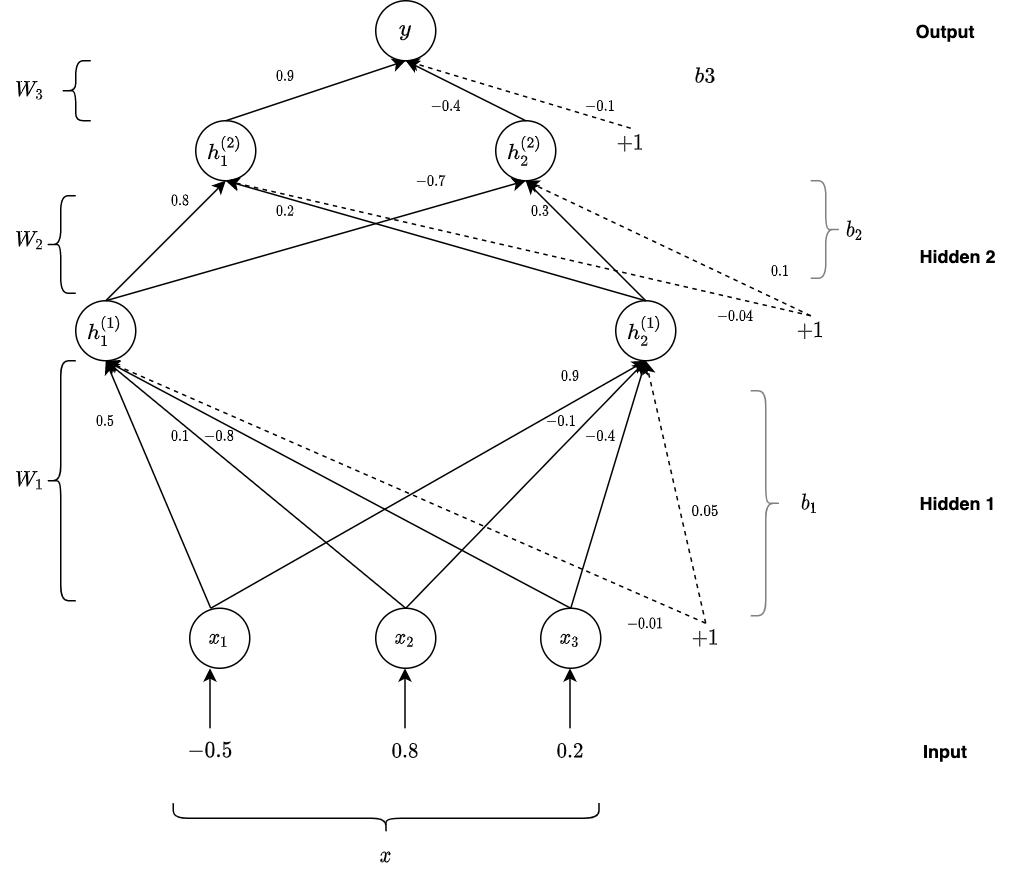

In [27]:
class FFNN_2:
    
    def __init__(self, vector_w_h1, b_h1, vector_w_h2, b_h2, vector_w_out, b_out):
        self.w_h1 = vector_w_h1
        self.b_h1 = b_h1
        self.w_h2 = vector_w_h2
        self.b_h2 = b_h2
        self.w_out = vector_w_out
        self.b_out = b_out
        
    def predict(self, x):
        #vector_h = non_linear(np.dot(vector_x, np.transpose(matrix_w_h)) + bias_h)
        h1_raw = vector_sum(matrix_mul(x, transpose(self.w_h1), a_is_vector=True), self.b_h1)
        h1 = []
        for val in h1_raw:
            h1.append(non_linear(val))
        print(h1)
        h2_raw = vector_sum(matrix_mul(h1, transpose(self.w_h2), a_is_vector=True), self.b_h2)
        h2 = []
        for val in h2_raw:
            h2.append(non_linear(val))
        print(h2)
        y = non_linear(dot_product(h2, self.w_out) + self.b_out)
        return y

In [28]:
w_h1 = [[0.5, 0.1, -0.8],[0.9, -0.1, -0.4]]
b_h1 = [-0.01, 0.05]

w_h2 = [[0.8, 0.2],[-0.7, 0.3]]
b_h2 = [-0.04, 0.1]

w_out_2 = [0.9, -0.4]
b_out_2 = -0.1

x_2 = [-0.5, 0.8, 0.2]

ffnn2 = FFNN_2(w_h1, b_h1, w_h2, b_h2, w_out_2, b_out_2)

ffnn2.predict(x_2)


[0.4158094770645927, 0.36354745971843366]
[0.5903366091421715, 0.4795108811132506]


0.5595900823827694

The correct values were found.

### Expected result:

- hidden layer 1 activations: [0.41581 , 0.36355]
- hidden layer 2 activations: [0.59034 , 0.47951]
- pred_prob_FFNN: 0.55959

(don't worry if the last few decimals are not identical!)